* Amir Esmaeili, 50225893, s77aesma@uni-bonn.de
* Kiavash Jamshidi, 50151853, s19kjams@uni-bonn.de

### Task 1.1


In [42]:
import string

def extract_words_tokens(any_string: str):
    # Split the string into words. Don't consider special characters as words
    words = [word for word in any_string.split() if word.strip(string.punctuation)]
    print("Words: ", words)
    num_words = len(words)

    # Perform character-based tokenization, excluding whitespace
    tokens = [char for char in any_string if char != ' ']  # Exclude spaces
    print("Tokens: ", tokens)
    num_tokens = len(tokens)

    return(print(any_string, ":", "num_words:", num_words, "and", "num_tokens:", num_tokens, "respectively"))

The function `extract_words_tokens` calculates:
1. `num_words`: Number of words in the string, ignoring special characters.
2. `num_tokens`: Number of characters (tokens), excluding spaces.

It splits the string by spaces to get words and removes punctuation.
For tokens, it counts each character, ignoring spaces.
Finally, it prints the original string with `num_words` and `num_tokens`.


In [43]:
texts = [
    " This is a random text! ",
    "Hello World! ",
    "How you doin ?"
]

for t in texts:
    extract_words_tokens(t)

Words:  ['This', 'is', 'a', 'random', 'text!']
Tokens:  ['T', 'h', 'i', 's', 'i', 's', 'a', 'r', 'a', 'n', 'd', 'o', 'm', 't', 'e', 'x', 't', '!']
 This is a random text!  : num_words: 5 and num_tokens: 18 respectively
Words:  ['Hello', 'World!']
Tokens:  ['H', 'e', 'l', 'l', 'o', 'W', 'o', 'r', 'l', 'd', '!']
Hello World!  : num_words: 2 and num_tokens: 11 respectively
Words:  ['How', 'you', 'doin']
Tokens:  ['H', 'o', 'w', 'y', 'o', 'u', 'd', 'o', 'i', 'n', '?']
How you doin ? : num_words: 3 and num_tokens: 11 respectively


### Task 1.2

In [44]:
import os
from typing import Union


def lemmatize(any_string: str, file_name: Union[str, os.PathLike]):
    lemma_dict = {}

    # Read the file and store a dictionary of words and their lemmas
    with open(file_name, 'r', encoding="utf-8-sig") as file:
        for line in file:
            lemma, word_form = line.strip().split("\t")
            lemma_dict[word_form] = lemma
    
    input_words = any_string.split()
    
    dictionary_of_lemmatized_words = {}
    for word in input_words:
        # Get words without any other characters
        word_without_special_characters = ''.join(e for e in word if e.isalnum())
        lower_word_without_special_characters = word_without_special_characters.lower()
        dictionary_of_lemmatized_words[word_without_special_characters] = lemma_dict.get(lower_word_without_special_characters, lower_word_without_special_characters)
    
    return dictionary_of_lemmatized_words

The `lemmatize` function takes a string and a file name as input:
1. It reads the file to create a dictionary `lemma_dict` mapping word forms to their lemmas.
   Each line in the file contains a lemma and word form, separated by a tab.
2. The function then processes each word in `any_string`:
   - It removes special characters and converts the word to lowercase.
   - It looks up the word in `lemma_dict` to find the lemma, defaulting to the word itself if no lemma is found.
3. Finally, it returns a dictionary mapping original words (without special characters) to their lemmatized forms.


In [45]:
test_text = "This is a sample text to be used by the lemmatize function. How are you doing?"

lemmatize(test_text, "lemmatization-en.txt")

{'This': 'this',
 'is': 'be',
 'a': 'a',
 'sample': 'sample',
 'text': 'text',
 'to': 'to',
 'be': 'be',
 'used': 'use',
 'by': 'by',
 'the': 'the',
 'lemmatize': 'lemmatize',
 'function': 'function',
 'How': 'how',
 'are': 'be',
 'you': 'you',
 'doing': 'do'}

### Task 2

In [46]:
import pandas as pd


column_names = ["Text", "Label"]
polarity_df = pd.read_csv("./polarity.txt", delimiter="\t", header=None, names=column_names)
polarity_df.head()

,Text,Label
0,every now and then a movie comes along from a ...,pos
1,"mtv films' _election , a high school comedy st...",pos
2,did anybody know this film existed a week befo...,pos
3,the plot is deceptively simple .,pos
4,george washington carver high school is having...,pos


### Task 2.1

The question asked to create a column and then drop the original one, I could do that
```python
polarity_df.drop(columns=["Label"])
```
But this way is simpler with less steps.

In [47]:
mapping = {
    "pos": 1,
    "neg": 0
}

polarity_df["Label"] = polarity_df["Label"].apply(lambda r: mapping[r])
polarity_df.head()

,Text,Label
0,every now and then a movie comes along from a ...,1
1,"mtv films' _election , a high school comedy st...",1
2,did anybody know this film existed a week befo...,1
3,the plot is deceptively simple .,1
4,george washington carver high school is having...,1


### Task 3

Based on the example in the question:
1. List all unique words and sort them alphabetically
2. Create a counter for words in the whole corpus
3. Count vector should contain all words in the corpus, not each line
4. Probability should only contain words in individual lines

In [48]:
import re
import csv
from collections import Counter

def create_count_and_probability(file_name: Union[str, os.PathLike]) -> str:
    with open(file_name, 'r') as file:
        lines = file.readlines()
    
    # First we need to find how many unique words are there in the document
    unique_words = set(re.findall(r"[\w']+", ''.join(lines).lower()))
    unique_words = sorted(unique_words)
    # Initialize a dictionary for holding indices of each word in the count vector
    word_indices = {word: index for index, word in enumerate(unique_words)}

    # Prepare a list to hold the output data
    output_data = []

    # Iterate over each line in the file
    for line in lines:
        # Split the line into words
        words = re.findall(r"[\w']+", line.lower())

        count_vector = [0] * len(unique_words)
        for word in words:
            # update count vector
            count_vector[word_indices[word]] += 1

        # Calculate the probability of each word in the line
        probability = [0] * len(words)
        for i, word in enumerate(words):
            probability[i] = count_vector[word_indices[word]] / len(words)
        
        output_data.append([line.strip(), count_vector, probability])
    
    # Write the output to a CSV file
    output_file_name = 'output.csv'
    with open(output_file_name, 'w', newline='') as csvfile:
        csv_writer = csv.writer(csvfile)
        csv_writer.writerow(['Text', 'Count_Vector', 'Probability'])  # Header
        csv_writer.writerows(output_data)
    
    return output_file_name

create_count_and_probability("./corpus.txt")

'output.csv'

# Task 4

In [49]:
import pandas as pd

# this helps results stay the same
seed = 1717


# Load and label data
def load_data(file_path: Union[str, os.PathLike], label: str) -> pd.DataFrame:
    with open(file_path, 'r') as file:
        documents = file.readlines()
    return pd.DataFrame({'Document': [doc.strip() for doc in documents], 'Class': label})

# Load rural and science datasets
rural_df = load_data('rural.txt', 'rural')
science_df = load_data('science.txt', 'science')

# Combine into a single DataFrame
data_df = pd.concat([rural_df, science_df], ignore_index=True)
# shuffle data -> Avoiding bias in dataset
data_df = data_df.sample(frac=1, random_state=seed).reset_index(drop=True)  # This creates 100% sample, shuffling it.
data_df.head(10)

,Document,Class
0,Wright says his findings do not get doctors of...,science
1,The discovery of OGLE-2005-BLG-390Lb also back...,science
2,Mr Geary said he had forwarded the email to tw...,rural
3,Wright's team dug up 480 strains of streptomyc...,science
4,Chicago wheat futures have dropped more than 3...,rural
5,AWB's national pool manager David Johnson deni...,rural
6,A southern Queensland cattle farmer says a kne...,rural
7,"The fatality rate is ""striking"" when compared ...",science
8,Steve Ellison from the Northern Territory Live...,rural
9,Outdoor coatings could benefit too,science


Since the document didn't say I have to use my own function, I used the one from libraries for
CountVector. 

I could also use nltk for removing stop words, but the document said I should use sklearn and pandas. However, I had to use matpllib for plotting.

Matplotlib is building the font cache; this may take a moment.


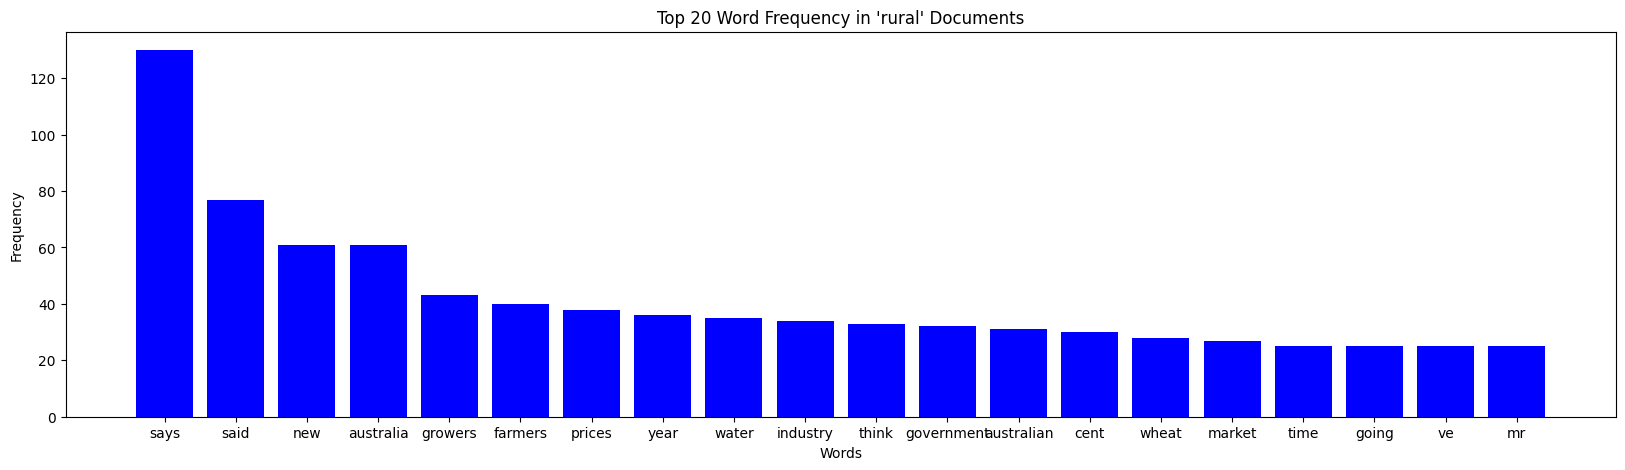

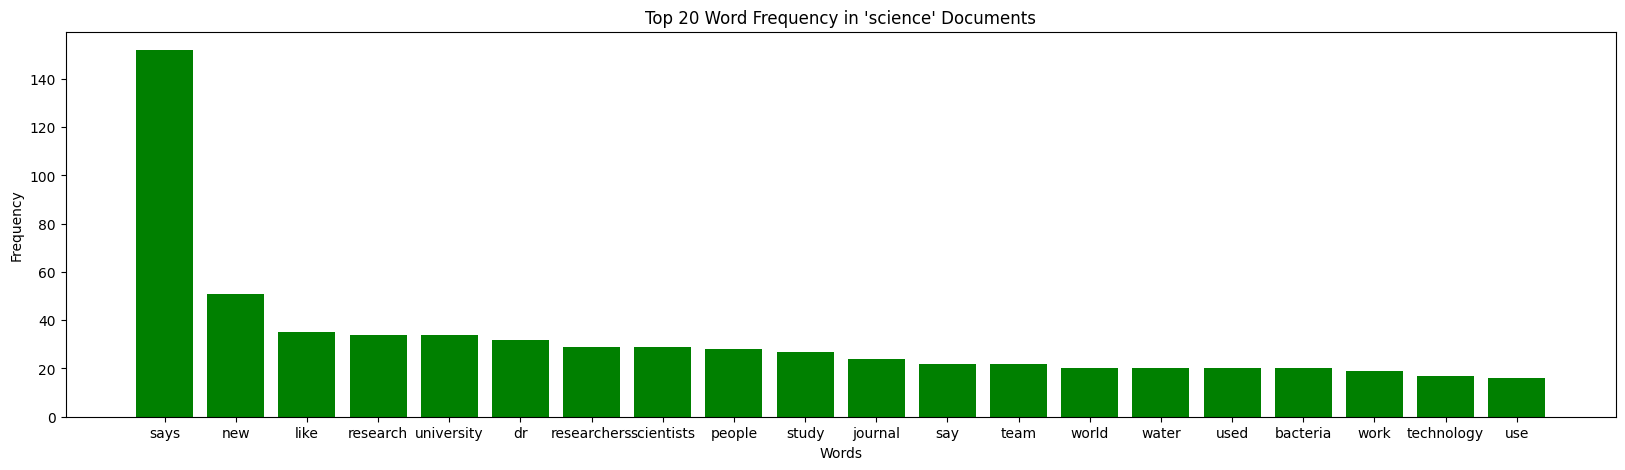

In [50]:
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt


# Remove stop words and calculate word frequency
def plot_word_frequency(df: pd.DataFrame, label: str) -> None:
    # Filter data by class label
    texts = df[df['Class'] == label]['Document']
    # Vectorize without stop words
    vectorizer = CountVectorizer(stop_words='english')
    word_counts = vectorizer.fit_transform(texts)
    word_freq = word_counts.sum(axis=0).A1  # Get total frequency for each word
    
    # Convert to DataFrame for plotting
    freq_df = pd.DataFrame({'word': vectorizer.get_feature_names_out(), 'count': word_freq})
    freq_df = freq_df.sort_values(by='count', ascending=False).head(20) # Top 20 words
    
    # Plot
    plt.figure(figsize=(20, 5))
    plt.bar(freq_df['word'], freq_df['count'], color='blue' if label == 'rural' else 'green')
    plt.title(f"Top 20 Word Frequency in '{label}' Documents")
    plt.xlabel("Words")
    plt.ylabel("Frequency")
    plt.show()

# Plot for both classes
plot_word_frequency(data_df, 'rural')
plot_word_frequency(data_df, 'science')


In [51]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer

# Split the data
X_train, X_test, y_train, y_test = train_test_split(data_df['Document'], data_df['Class'], test_size=0.3, random_state=seed)

# Helper function to train and test classifiers
def train_and_test(vectorizer, classifier_name):
    # Fit and transform training data, transform test data
    X_train_vect = vectorizer.fit_transform(X_train)
    X_test_vect = vectorizer.transform(X_test)
    
    if classifier_name == 'GaussianNB':
        model = GaussianNB()
        X_train_vect = X_train_vect.toarray()  # Convert to dense matrix for GaussianNB
        X_test_vect = X_test_vect.toarray()
    else:
        model = LogisticRegression(max_iter=1000)
    
    # Train and predict
    model.fit(X_train_vect, y_train)
    y_pred = model.predict(X_test_vect)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{classifier_name} with {'One-Hot' if vectorizer.binary else 'Count'} Vectorization Accuracy: {accuracy:.3f}")

# One-Hot Encoding and Count Vectorization with both classifiers
one_hot_vectorizer = CountVectorizer(binary=True, stop_words='english')
count_vectorizer = CountVectorizer(binary=False, stop_words='english')

train_and_test(one_hot_vectorizer, 'GaussianNB')
train_and_test(one_hot_vectorizer, 'LogisticRegression')
train_and_test(count_vectorizer, 'GaussianNB')
train_and_test(count_vectorizer, 'LogisticRegression')


GaussianNB with One-Hot Vectorization Accuracy: 0.914
LogisticRegression with One-Hot Vectorization Accuracy: 0.908
GaussianNB with Count Vectorization Accuracy: 0.911
LogisticRegression with Count Vectorization Accuracy: 0.902
